# Decision Tree - ID3 algo

In [75]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import math
import itertools

import numpy as np
import pandas as pd
import ete3

from decision_tree import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1. ID3

To see the code for the **ID3** algorithm and the decision tree structure, see the file `decision_tree.py` in the same directory.

My algo only accepts either `pandas.Dataframe` or `pandas.Serie` as it was easier to handle each attributes.

## 1.1. Toy Problem: PlayTennis?

In [117]:
df_tennis = pd.read_csv('tennis.csv')
df_tennis.head(n=3)

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes


In [118]:
target_attr = df_tennis.columns.tolist()[-1]
attrs = df_tennis.columns.tolist()[:-1]

id3_tennis = ID3(criterion='infogain')
id3_tennis.fit(df_tennis, target_attr, attrs)
print('Score on training data:', id3_tennis.score(df_tennis))

Outlook -49.848471851517274
Temperature -52.8938531336246
Humidity -51.17727199245788
Wind -52.62919057937032

Temperature -8.754888083513036
Humidity -6.7548880823669375
Wind -11.509775040017633

Temperature -11.509775040017633
Humidity -11.509775040017635
Wind -6.7548880823669375

Score on training data: 1.0


## 1.2. Sexy verbose

Done with the library `ete3`.

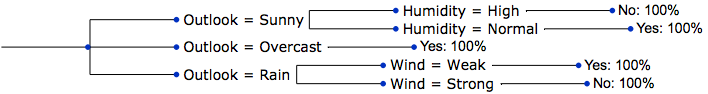

In [78]:
id3_tennis.display_tree()

## 1.3. Return of the Magic Muschroom!

Score on training data: 1.0


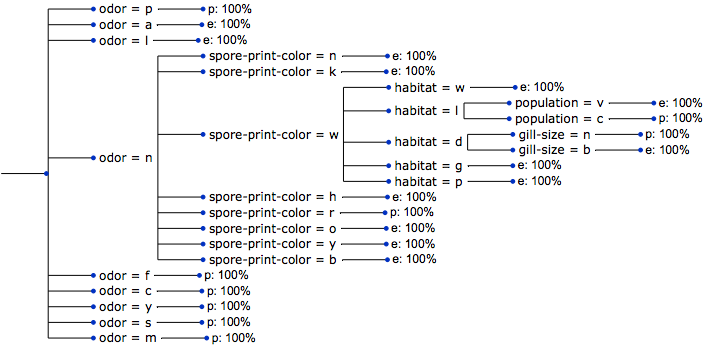

In [80]:
df_mushroom = pd.read_csv('agaricus-lepiota.csv')
target_attr = df_mushroom.columns.tolist()[0]
attrs = df_mushroom.columns.tolist()[1:]

id3_mushroom = ID3(criterion='infogain')
id3_mushroom.fit(df_mushroom, target_attr, attrs)
print('Score on training data:', id3_mushroom.score(df_mushroom))

id3_mushroom.display_tree()

# 2. Improvements

## 2.1. Selection of the attribute

### 2.1.1. Dataset *PlayTennis?*

In [63]:
df_tennis = pd.read_csv('tennis.csv')
target_attr = df_tennis.columns.tolist()[-1]
attrs = df_tennis.columns.tolist()[:-1]

Information Gain:


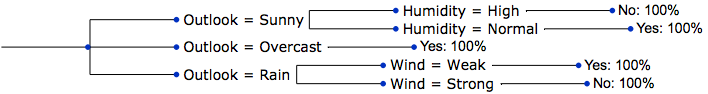

In [64]:
id3_tennis = ID3(criterion='infogain')
id3_tennis.fit(df_tennis, target_attr, attrs)
print('Information Gain:')
id3_tennis.display_tree()

Gain ratio:


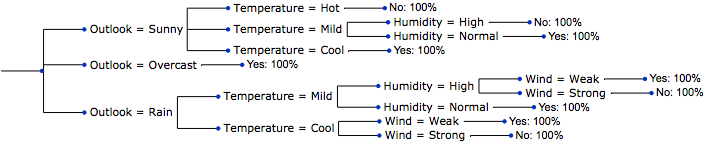

In [65]:
id3_tennis = ID3(criterion='gainratio')
id3_tennis.fit(df_tennis, target_attr, attrs)
print('Gain ratio:')
id3_tennis.display_tree()

Gini Impurity:


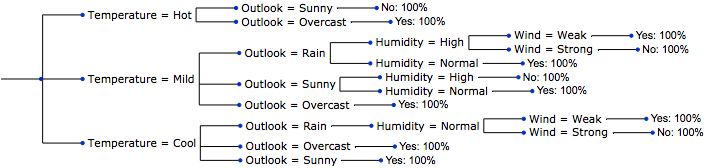

In [66]:
id3_tennis = ID3(criterion='gini')
id3_tennis.fit(df_tennis, target_attr, attrs)
print('Gini Impurity:')
id3_tennis.display_tree()

### 2.1.2. Dataset *Mushroom*

In [67]:
df_mushroom = pd.read_csv('agaricus-lepiota.csv')
target_attr = df_mushroom.columns.tolist()[0]
attrs = df_mushroom.columns.tolist()[1:]

Information Gain:


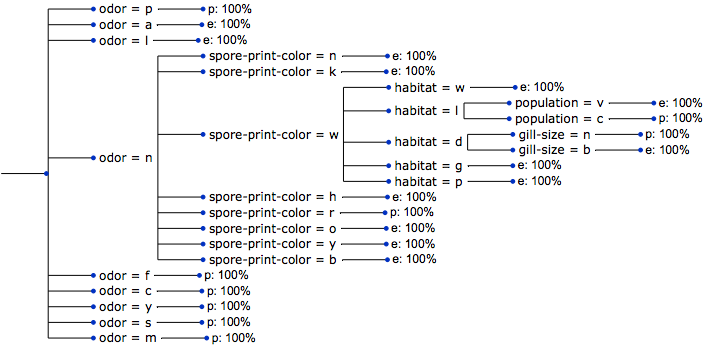

In [68]:
id3_mushroom = ID3(criterion='infogain')
id3_mushroom.fit(df_mushroom, target_attr, attrs)
print('Information Gain:')
id3_mushroom.display_tree()

Gain ratio:


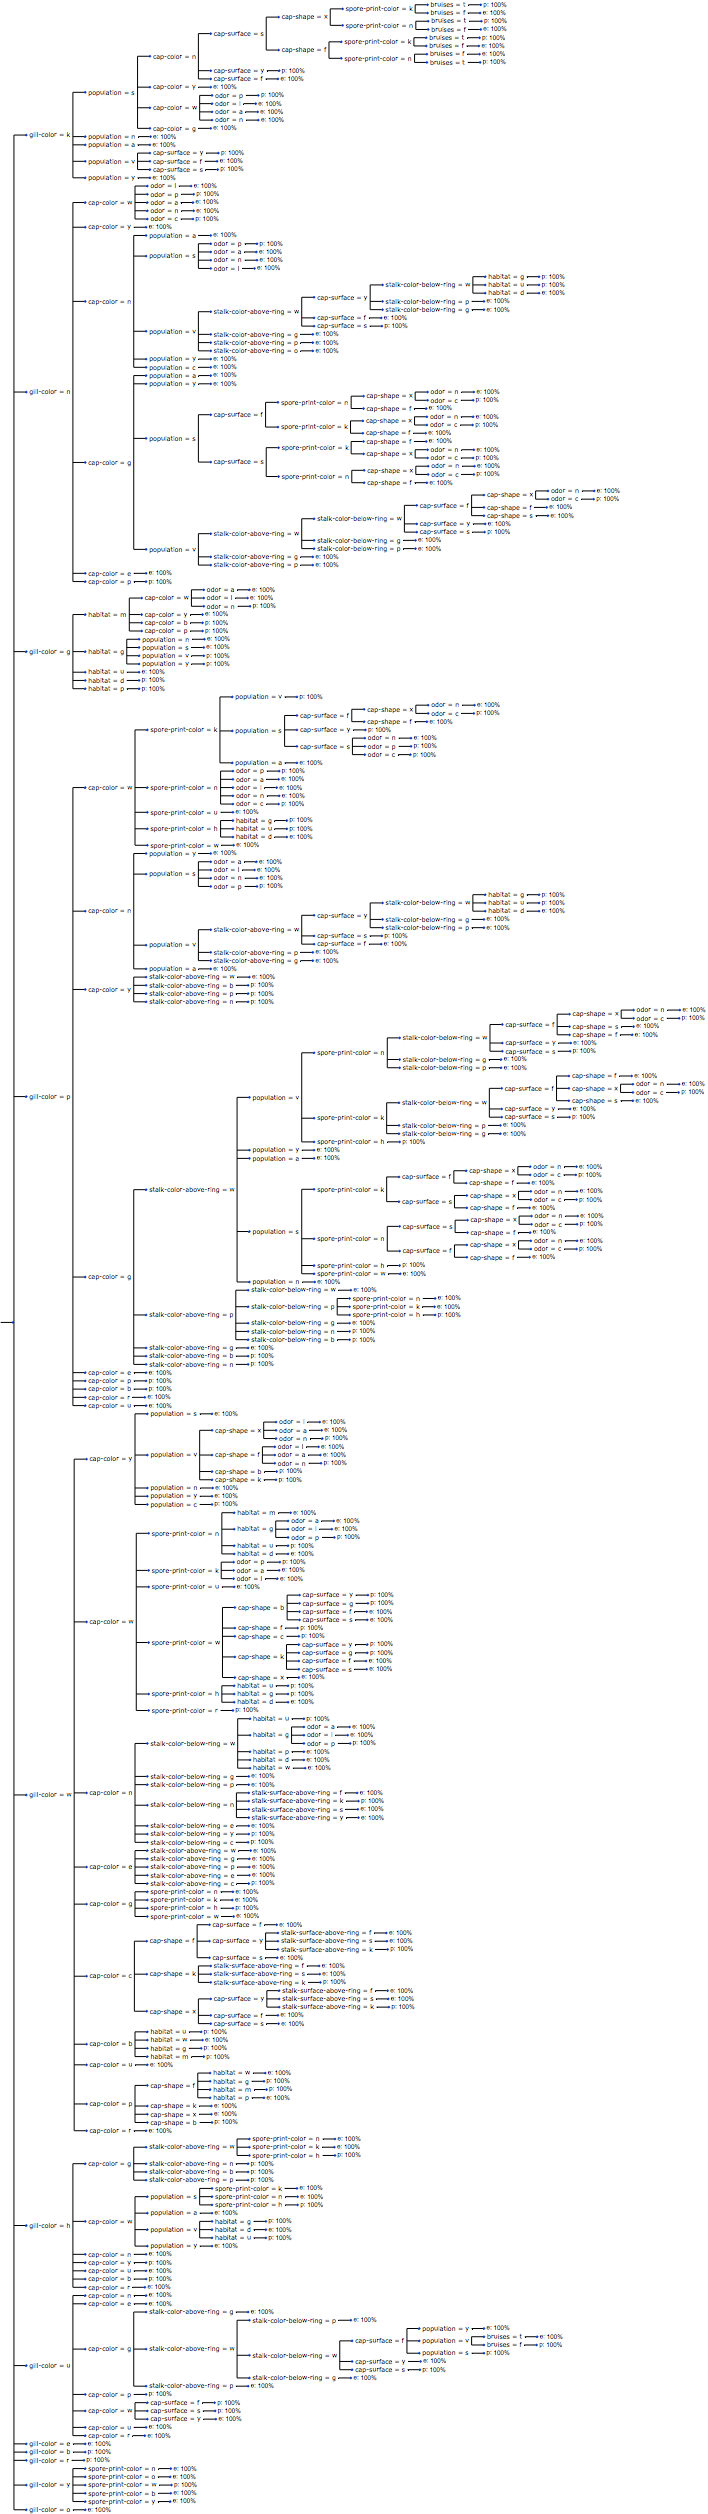

In [69]:
id3_mushroom = ID3(criterion='gainratio')
id3_mushroom.fit(df_mushroom, target_attr, attrs)
print('Gain ratio:')
id3_mushroom.display_tree()

Gini Impurity:


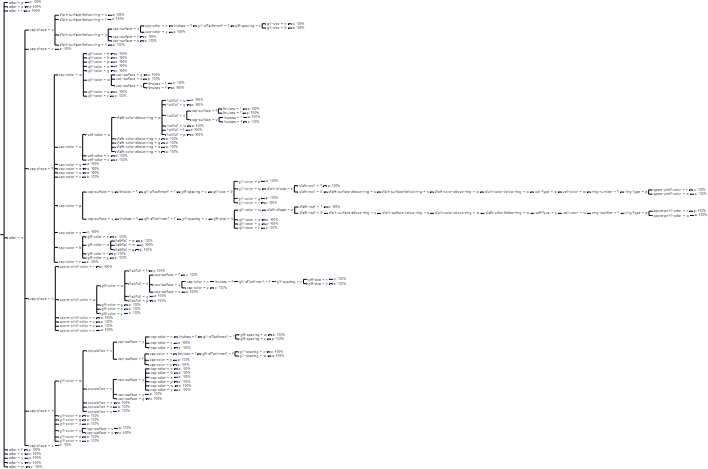

In [70]:
id3_mushroom = ID3(criterion='gini')
id3_mushroom.fit(df_mushroom, target_attr, attrs)
print('Gini Impurity:')
id3_mushroom.display_tree()

## 2.2. Continuous attributes

Instead of using the possible values of a categorical attribute, for a continuous attribute we use a split based on the mediane value.

If the target attribute is a continuous attribute, the leaf value is the mean of the examples present in this node.

### 2.2.1. Dataset *Iris*

Continuous attributes and categorical target attribute.

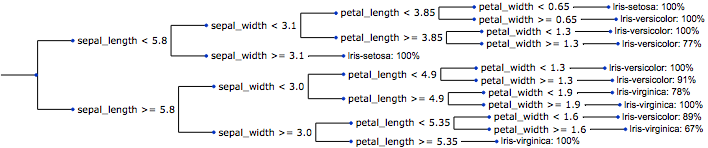

In [73]:
df_iris = pd.read_csv('iris.csv')
target_attr = df_iris.columns.tolist()[-1]
attrs = df_iris.columns.tolist()[:-1]


id3_iris = ID3(criterion='gini')
id3_iris.fit(df_iris, target_attr, attrs)
id3_iris.display_tree()

### 2.2.2. Dataset *Auto-mpg*

https://archive.ics.uci.edu/ml/datasets/automobile

Not all features are used for the sake of a fancy display of the generated decision tree.

Categorical & continuous attributes and continuous target attribute.

0.04020100502512563


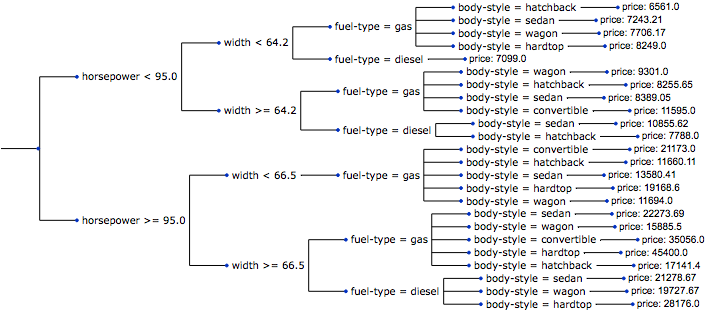

In [132]:
fields = ['horsepower', 'fuel-type', 'width', 'body-style', 'price']
df_auto = pd.read_csv('auto.csv', usecols=fields)

attrs = fields[:-1]
target_attr = fields[-1]

id3_auto = ID3(criterion='gini')
id3_auto.fit(df_auto, target_attr, attrs)
print(id3_auto.score(df_auto))
id3_auto.display_tree()